Analysis Based on Findings
1. Introduction
The project aimed to predict electricity production using various time-series forecasting techniques. The dataset comprised temporal features like day and hour, along with weather-related variables. The data was preprocessed, normalized, and used to train several neural network models, including three Artificial Neural Networks (ANNs) and one Long Short-Term Memory (LSTM) network. The performance of these models was evaluated using RMSE, MAE, and R² metrics.

2. Data Quality Assessment
The initial data quality assessment revealed that the dataset was generally well-structured with no significant missing values. Visual inspections through plots indicated cyclical patterns in the electricity produption, aligning with daily and seasonal variations. The descriptive statistics helped in identifying the range and distribution of the features, ensuring that the data was suitable for model training.

3. Feature Engineering
To capture the temporal dynamics in the data, sine and cosine transformations were applied to the 'Day' and 'Hour' features. This approach effectively modeled the cyclical nature of time-series data. Additionally, the normalization of features and target variables ensured that the neural network models received inputs on a consistent scale, facilitating faster convergence and better performance.

4. Model Selection and Training
Four models were trained:

Three ANNs: Each with varying architectures to explore different depths and complexities.
One LSTM: Specifically designed to capture long-term dependencies in time-series data.
The ANNs were chosen for their ability to model non-linear relationships, while the LSTM was selected for its strength in handling sequential data. The models were trained using the RMSprop optimizer, known for its efficiency in dealing with the non-stationarity of the data.

5. Model Performance Evaluation
The models were evaluated using the following metrics:

RMSE: This metric highlighted the average magnitude of errors, with a higher sensitivity to large deviations.
MAE: Provided a measure of the average absolute errors, less influenced by outliers compared to RMSE.
R²: Indicated the proportion of variance in electricity consumption explained by the models.

6. Key Findings
ANNs Performance: The ANNs demonstrated good predictive capabilities, with reasonably low RMSE and MAE values. The R² scores indicated that the models could explain a significant portion of the variance in the data.
LSTM Performance: The LSTM model showed superior performance in capturing the temporal dependencies, resulting in lower error metrics compared to the ANNs. This validated the choice of using LSTM for time-series forecasting.

7. Important Observations
Data Splitting: Splitting the data without shuffling preserved the temporal order, which is crucial for realistic time-series forecasting. This approach ensured that future data points were predicted based on past data, mimicking real-world scenarios.
Optimizer Choice: The use of the RMSprop optimizer facilitated efficient training of the neural networks, handling the non-stationarity and ensuring steady convergence.

8. Conclusion
The analysis confirmed that both ANNs and LSTM networks are effective in forecasting electricity consumption, with the LSTM model showing a slight edge due to its ability to capture long-term dependencies. The careful preprocessing, feature engineering, and model evaluation steps contributed to the robustness and reliability of the predictions. Future work could explore incorporating additional external factors, such as economic indicators or energy prices, to further enhance the predictive accuracy.

9. Future Recommendations
Model Ensemble: Combining the predictions of multiple models (ensemble learning) could potentially improve forecasting accuracy.
Feature Expansion: Including more granular weather data or other external variables could provide additional insights.
Real-time Data Integration: Implementing real-time data feeds could allow for continuous model updating and more accurate short-term forecasts.

In [1]:
#import-libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
Optimizer = RMSprop(learning_rate=0.001)
from pandas import Timestamp
from numpy import sin, cos, pi
from tensorflow.keras.regularizers import l2

In [2]:
df=pd.read_csv(r"C:\Users\johnn\photovoltaics\ninja_pv_38.1939_23.5793_uncorrected.csv")
df["local_time"] = pd.to_datetime(df["local_time"])
#df.set_index('local_time', inplace=True)
df.drop(['time','local_time'],axis=1,inplace=True)
df=df.round(2)

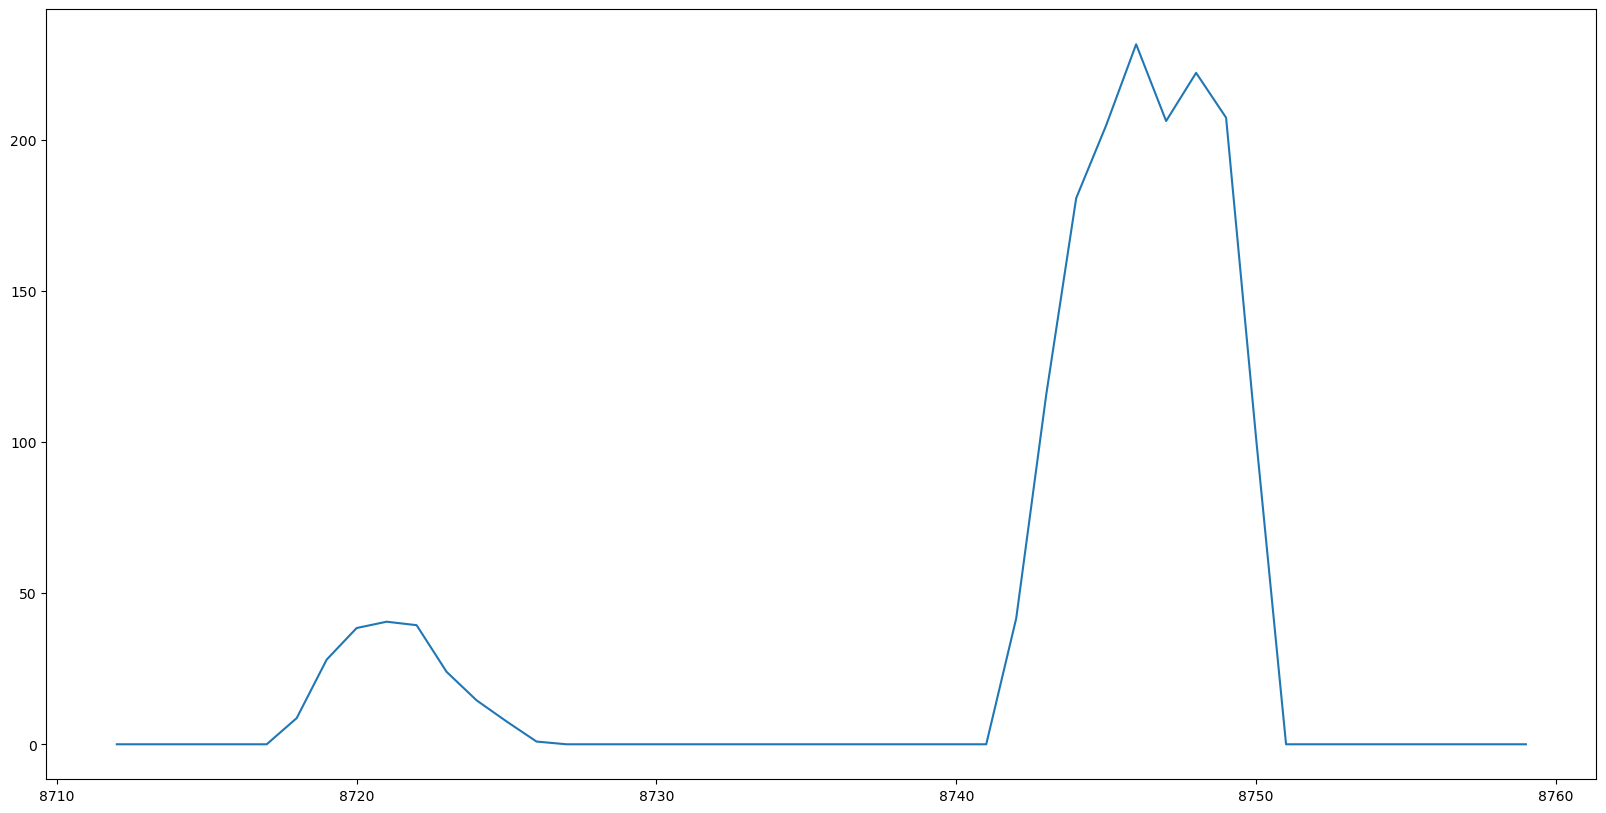

<Figure size 1000x600 with 0 Axes>

In [3]:

fig, ax = plt.subplots(figsize=(20, 10))
plt.figure(figsize=(10, 6))
ax.plot(df['electricity'][-48:])

In [4]:
df2=pd.read_csv(r"C:\Users\johnn\photovoltaics\ninja_weather_38.1939_23.5793_uncorrected.csv")
df2["local_time"] = pd.to_datetime(df2["local_time"])
#df2.set_index('local_time', inplace=True)
df2.drop(['time'],axis=1,inplace=True)
df2=df2.round(2)

In [5]:
df2
#units: time in UTC, local_time in Europe/Athens, t2m in ºC, rhoa in kg/m³, swgdn in W/m², swtdn in W/m², cldtot in fraction
#t2m:Air temperature at 2 meters above ground.
#rhoa:Air density at ground level.
#swgdn:Surface-level incident shortwave radiation flux, considering cloud cover and aerosols
#swtdn:Top of atmosphere incident shortwave radiation flux, before cloud cover and aerosol influences
#cldtot:Fraction of cloud cover, averaged over grid cell and summed over all height above ground

,local_time,t2m,rhoa,swgdn,swtdn,cldtot
0,2019-01-01 02:00:00,6.71,1.23,0.0,0.0,0.94
1,2019-01-01 03:00:00,6.55,1.23,0.0,0.0,0.90
2,2019-01-01 04:00:00,6.47,1.23,0.0,0.0,0.89
3,2019-01-01 05:00:00,6.46,1.23,0.0,0.0,0.86
4,2019-01-01 06:00:00,6.38,1.23,0.0,0.0,0.83
...,...,...,...,...,...,...
8755,2019-12-31 21:00:00,5.19,1.24,0.0,0.0,0.00
8756,2019-12-31 22:00:00,4.95,1.24,0.0,0.0,0.00
8757,2019-12-31 23:00:00,4.69,1.24,0.0,0.0,0.00
8758,2020-01-01 00:00:00,4.39,1.24,0.0,0.0,0.00


In [6]:
df2 = pd.concat([df2, df],axis=1)


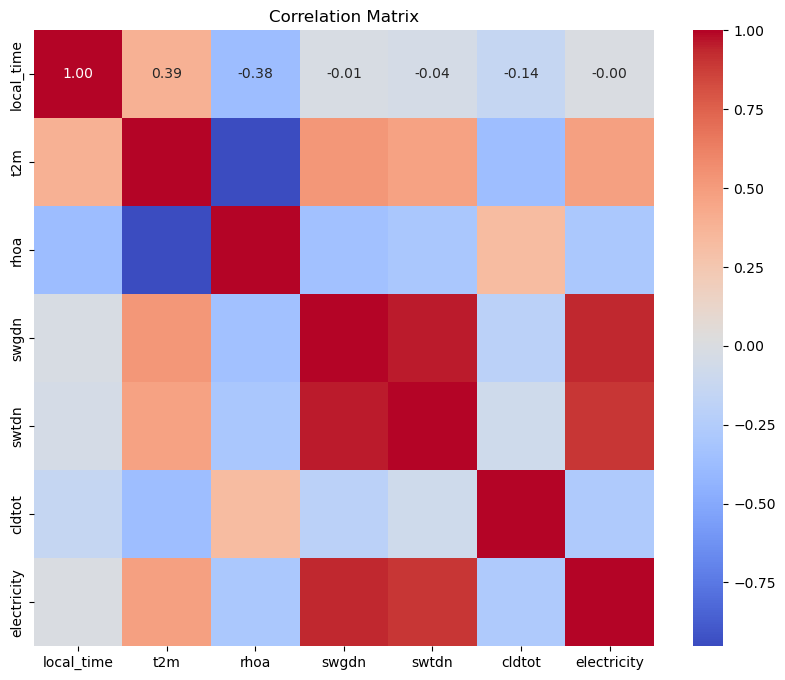

,local_time,t2m,rhoa,swgdn,swtdn,cldtot,electricity
local_time,1.000000,0.385646,-0.377150,-0.014642,-0.039496,-0.138450,-0.002256
t2m,0.385646,1.000000,-0.951676,0.520292,0.471933,-0.364726,0.474603
rhoa,-0.377150,-0.951676,1.000000,-0.343628,-0.297095,0.327757,-0.288832
swgdn,-0.014642,0.520292,-0.343628,1.000000,0.961280,-0.203992,0.933887
swtdn,-0.039496,0.471933,-0.297095,0.961280,1.000000,-0.079083,0.896519
cldtot,-0.138450,-0.364726,0.327757,-0.203992,-0.079083,1.000000,-0.265728
electricity,-0.002256,0.474603,-0.288832,0.933887,0.896519,-0.265728,1.000000


In [7]:

corr = df2.corr()

# Plot using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()
corr

In [8]:
df2=df2.drop(columns=['swtdn', 'rhoa'])

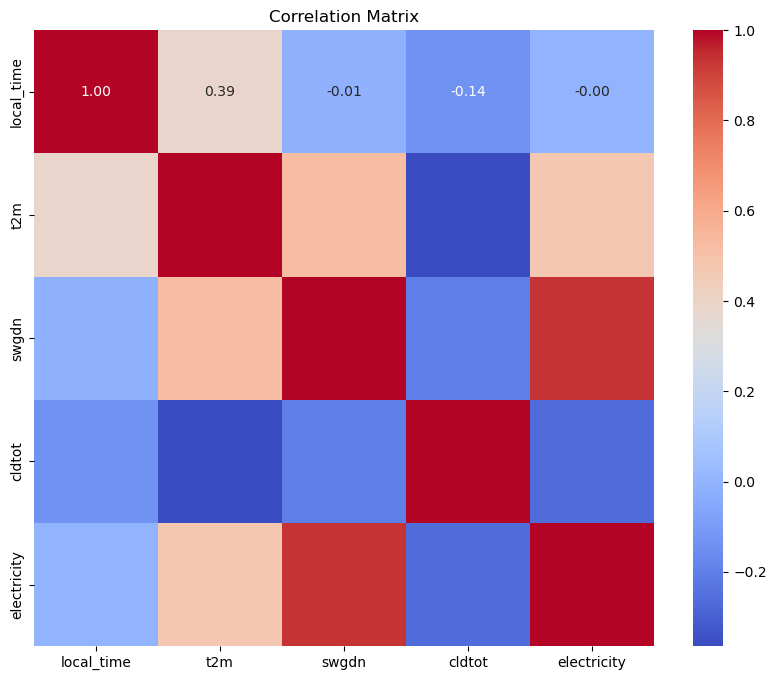

,local_time,t2m,swgdn,cldtot,electricity
local_time,1.000000,0.385646,-0.014642,-0.138450,-0.002256
t2m,0.385646,1.000000,0.520292,-0.364726,0.474603
swgdn,-0.014642,0.520292,1.000000,-0.203992,0.933887
cldtot,-0.138450,-0.364726,-0.203992,1.000000,-0.265728
electricity,-0.002256,0.474603,0.933887,-0.265728,1.000000


In [9]:
corr = df2.corr()

# Plot using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()
corr

In [10]:

# Create seconds from timestamp for cyclic encoding
df2['Seconds'] = df2['local_time'].apply(lambda x: x.timestamp())

# Constants for time calculations
day = 60 * 60 * 24
year = 365.2425 * day
hour = 60 * 60
month = year / 12

# Cyclic encoding for daily, hourly, and monthly frequencies
df2['Day sin'] = np.sin(df2['Seconds'] * (2 * pi / day))
df2['Day cos'] = np.cos(df2['Seconds'] * (2 * pi / day))

df2['Hour sin'] = np.sin(df2['Seconds'] * (2 * pi / hour))
df2['Hour cos'] = np.cos(df2['Seconds'] * (2 * pi / hour))

df2['Month sin'] = np.sin(df2['Seconds'] * (2 * pi / month))
df2['Month cos'] = np.cos(df2['Seconds'] * (2 * pi / month))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   local_time   8760 non-null   datetime64[ns]
 1   t2m          8760 non-null   float64       
 2   swgdn        8760 non-null   float64       
 3   cldtot       8760 non-null   float64       
 4   electricity  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 342.3 KB


In [11]:
df2

,local_time,t2m,swgdn,cldtot,electricity,Seconds,Day sin,Day cos,Hour sin,Hour cos,Month sin,Month cos
0,2019-01-01 02:00:00,6.71,0.0,0.94,0.0,1.546308e+09,5.000000e-01,8.660254e-01,9.160162e-11,1.0,0.041447,0.999141
1,2019-01-01 03:00:00,6.55,0.0,0.90,0.0,1.546312e+09,7.071068e-01,7.071068e-01,-1.514824e-10,1.0,0.050039,0.998747
2,2019-01-01 04:00:00,6.47,0.0,0.89,0.0,1.546315e+09,8.660254e-01,5.000000e-01,7.109487e-11,1.0,0.058628,0.998280
3,2019-01-01 05:00:00,6.46,0.0,0.86,0.0,1.546319e+09,9.659258e-01,2.588190e-01,-1.719892e-10,1.0,0.067212,0.997739
4,2019-01-01 06:00:00,6.38,0.0,0.83,0.0,1.546322e+09,1.000000e+00,7.593439e-12,5.058811e-11,1.0,0.075791,0.997124
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 21:00:00,5.19,0.0,0.00,0.0,1.577826e+09,-7.071068e-01,7.071068e-01,-3.691276e-11,1.0,-0.051585,0.998669
8756,2019-12-31 22:00:00,4.95,0.0,0.00,0.0,1.577830e+09,-5.000000e-01,8.660254e-01,1.856645e-10,1.0,-0.042994,0.999075
8757,2019-12-31 23:00:00,4.69,0.0,0.00,0.0,1.577833e+09,-2.588190e-01,9.659258e-01,-5.741952e-11,1.0,-0.034399,0.999408
8758,2020-01-01 00:00:00,4.39,0.0,0.00,0.0,1.577837e+09,-7.670342e-12,1.000000e+00,1.651578e-10,1.0,-0.025801,0.999667


In [12]:
df2.drop(columns=['Seconds'], inplace=True)

Epoch 1/150
194/194 [==============================] - 1s 2ms/step - loss: 0.5801 - val_loss: 0.0922
Epoch 2/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.0450
Epoch 3/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.0381
Epoch 4/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0412 - val_loss: 0.0371
Epoch 5/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0399 - val_loss: 0.0375
Epoch 6/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.0411
Epoch 7/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0375 - val_loss: 0.0350
Epoch 8/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0365 - val_loss: 0.0431
Epoch 9/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0361 - val_loss: 0.0316
Epoch 10/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0351 - val_lo

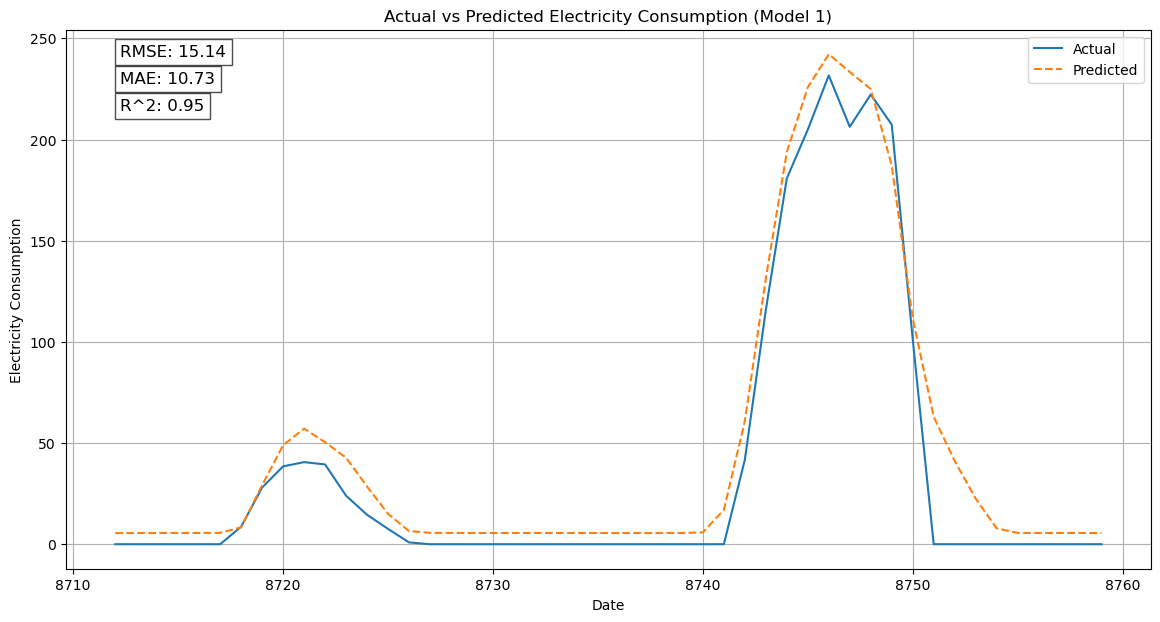

In [13]:
#model 1
from keras.optimizers import RMSprop
Optimizer = RMSprop(learning_rate=0.001)
X1 = df2[['t2m', 'swgdn', 'cldtot', 'Day sin', 'Day cos', 'Hour sin', 'Hour cos', 'Month sin', 'Month cos']]
Y1 = df2['electricity']

# Split data into training and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=48, shuffle=False)

# Normalize features using MinMaxScaler
scaler_X1 = MinMaxScaler()
X_train_scaled1 = scaler_X1.fit_transform(X_train1)
X_test_scaled1 = scaler_X1.transform(X_test1)

# Normalize the target variable
scaler_Y1 = MinMaxScaler()
Y_train_scaled1 = scaler_Y1.fit_transform(Y_train1.values.reshape(-1, 1)).flatten()
Y_test_scaled1 = scaler_Y1.transform(Y_test1.values.reshape(-1, 1)).flatten()

# Define ANN model with L2 regularization and Dropout
model1 = Sequential()
model1.add(Dense(128, input_dim=X_train_scaled1.shape[1], activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(Dropout(0.3))
model1.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(Dropout(0.2))
model1.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(Dropout(0.2))
model1.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(Dense(1))  # Output layer
model1.compile(loss='mse', optimizer=Optimizer)

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history1 = model1.fit(X_train_scaled1, Y_train_scaled1, epochs=150, batch_size=36, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Initialize lists to store predictions and expected values
predictions1 = []
expected1 = []

# Iterate over the last 48 samples in the test set to make predictions
for i in range(len(X_test_scaled1)):
    # Reshape the input for prediction
    reshaped_input1 = X_test_scaled1[i, :].reshape(1, -1)

    # Make prediction
    yhat_scaled1 = model1.predict(reshaped_input1)
    yhat_scaled1 = yhat_scaled1[0][0]  # Get the prediction value

    # Revert the scaling for prediction and expected values
    yhat1 = scaler_Y1.inverse_transform([[yhat_scaled1]])[0][0]
    expected_value1 = Y_test1.iloc[i]

    # Store expected and predicted values
    expected1.append(expected_value1)
    predictions1.append(yhat1)

    # Print the results for each hour (optional)
    print(f'Hour {i+1}, Predicted={yhat1}, Expected={expected_value1}')

# Calculate mean squared error for the last 48 hours
mse1 = mean_squared_error(expected1, predictions1)
print('Overall Loss (Mean Squared Error) for the last 48 hours:', mse1)

# Create DataFrame for plotting
data1 = pd.DataFrame({'Expectations': expected1, 'Predictions': predictions1}, index=Y_test1.index[-48:])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data1.index, data1['Expectations'], label='Actual')
plt.plot(data1.index, data1['Predictions'], label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Electricity Consumption (Model 1)')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.legend()

# Annotate with metrics
plt.annotate(f'RMSE: {np.sqrt(mse1):.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))
plt.annotate(f'MAE: {mean_absolute_error(data1["Expectations"], data1["Predictions"]):.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))
plt.annotate(f'R^2: {r2_score(data1["Expectations"], data1["Predictions"]):.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True)
plt.show()


Epoch 1/150
194/194 [==============================] - 1s 2ms/step - loss: 0.5417 - val_loss: 0.0904
Epoch 2/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0617 - val_loss: 0.0440
Epoch 3/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0448 - val_loss: 0.0390
Epoch 4/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0422 - val_loss: 0.0422
Epoch 5/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.0351
Epoch 6/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0385 - val_loss: 0.0343
Epoch 7/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.0399
Epoch 8/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.0391
Epoch 9/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0358 - val_loss: 0.0338
Epoch 10/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0354 - val_lo

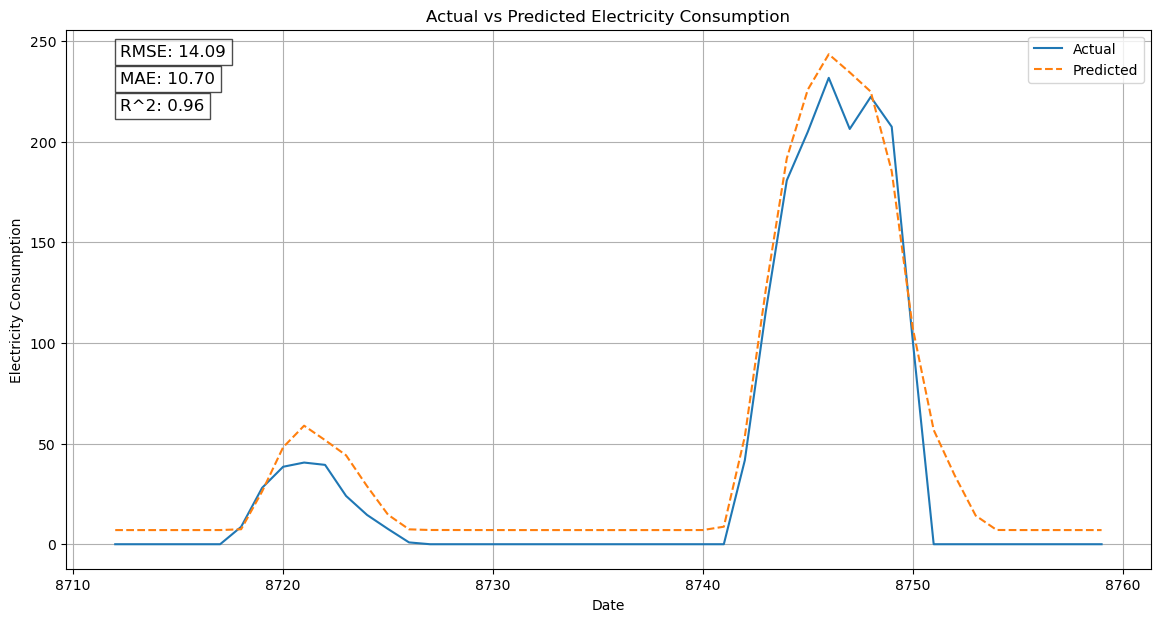

In [14]:
#model 2
from keras.optimizers import RMSprop
Optimizer = RMSprop(learning_rate=0.001)
# Define features and target variable
X2 = df2[['t2m', 'swgdn', 'cldtot', 'Day sin', 'Day cos', 'Hour sin', 'Hour cos']]
Y2 = df2['electricity']

# Split data into training and testing sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=48, shuffle=False)

# Normalize features using MinMaxScaler
scaler_X2 = MinMaxScaler()
X_train_scaled2 = scaler_X2.fit_transform(X_train2)
X_test_scaled2 = scaler_X2.transform(X_test2)

# Normalize the target variable
scaler_Y2 = MinMaxScaler()
Y_train_scaled2 = scaler_Y2.fit_transform(Y_train2.values.reshape(-1, 1)).flatten()
Y_test_scaled2 = scaler_Y2.transform(Y_test2.values.reshape(-1, 1)).flatten()

# Define ANN model with L2 regularization and Dropout
model2 = Sequential()
model2.add(Dense(128, input_dim=X_train_scaled2.shape[1], activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(Dense(1))  # Output layer
model2.compile(loss='mse', optimizer=Optimizer)

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history2 = model2.fit(X_train_scaled2, Y_train_scaled2, epochs=150, batch_size=36, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Initialize lists to store predictions and expected values
predictions2 = []
expected2 = []

# Iterate over the last 48 samples in the test set to make predictions
for i in range(len(X_test_scaled2)):
    # Reshape the input for prediction
    reshaped_input2 = X_test_scaled2[i, :].reshape(1, -1)

    # Make prediction
    yhat_scaled2 = model2.predict(reshaped_input2)
    yhat_scaled2 = yhat_scaled2[0][0]  # Get the prediction value

    # Revert the scaling for prediction and expected values
    yhat2 = scaler_Y2.inverse_transform([[yhat_scaled2]])[0][0]
    expected_value2 = Y_test2.iloc[i]

    # Store expected and predicted values
    expected2.append(expected_value2)
    predictions2.append(yhat2)

    # Print the results for each hour
    print(f'hour={i+1}, Predicted={yhat2}, Expected={expected_value2}')

# Calculate mean squared error for the last 48 hours
mse2 = mean_squared_error(expected2, predictions2)
print('Overall Loss (Mean Squared Error) for the last 48 hours:', mse2)

# Create DataFrame for plotting
data2 = pd.DataFrame({'Expectations': expected2, 'Predictions': predictions2}, index=Y_test2.index[-48:])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data2.index, data2['Expectations'], label='Actual')
plt.plot(data2.index, data2['Predictions'], label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.legend()

# Annotate with metrics
plt.annotate(f'RMSE: {np.sqrt(mse2):.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))
plt.annotate(f'MAE: {mean_absolute_error(data2["Expectations"], data2["Predictions"]):.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))
plt.annotate(f'R^2: {r2_score(data2["Expectations"], data2["Predictions"]):.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True)
plt.show()


Epoch 1/150
194/194 [==============================] - 1s 3ms/step - loss: 0.5363 - val_loss: 0.0970
Epoch 2/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0680 - val_loss: 0.0501
Epoch 3/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0454
Epoch 4/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0461 - val_loss: 0.0438
Epoch 5/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0438 - val_loss: 0.0483
Epoch 6/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0417 - val_loss: 0.0379
Epoch 7/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0411 - val_loss: 0.0470
Epoch 8/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0395 - val_loss: 0.0392
Epoch 9/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0387 - val_loss: 0.0354
Epoch 10/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0376 - val_lo

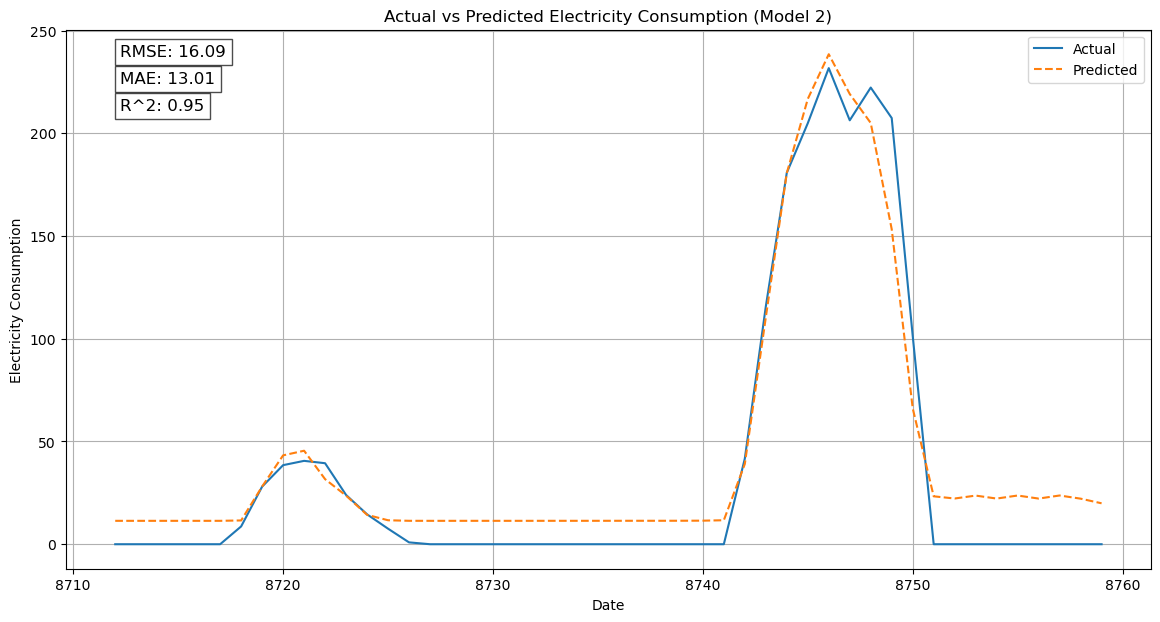

In [15]:
#model 3
from keras.optimizers import RMSprop
Optimizer = RMSprop(learning_rate=0.001)
# Define features and target variable
X3 = df2[['t2m', 'swgdn', 'cldtot','Hour sin', 'Hour cos']]
Y3 = df2['electricity']

# Split data into training and testing sets
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=48, shuffle=False)

# Normalize features using MinMaxScaler
scaler_X3 = MinMaxScaler()
X_train_scaled3 = scaler_X3.fit_transform(X_train3)
X_test_scaled3 = scaler_X3.transform(X_test3)

# Normalize the target variable
scaler_Y3 = MinMaxScaler()
Y_train_scaled3 = scaler_Y3.fit_transform(Y_train3.values.reshape(-1, 1)).flatten()
Y_test_scaled3 = scaler_Y3.transform(Y_test3.values.reshape(-1, 1)).flatten()

# Define ANN model with L2 regularization and Dropout
model3 = Sequential()
model3.add(Dense(128, input_dim=X_train_scaled3.shape[1], activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model3.add(Dropout(0.2))
model3.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model3.add(Dense(1))  # Output layer
model3.compile(loss='mse', optimizer=Optimizer)

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history3 = model3.fit(X_train_scaled3, Y_train_scaled3, epochs=150, batch_size=36, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Initialize lists to store predictions and expected values
predictions3 = []
expected3 = []

# Iterate over the last 48 samples in the test set to make predictions
for i in range(len(X_test_scaled3)):
    # Reshape the input for prediction
    reshaped_input3 = X_test_scaled3[i, :].reshape(1, -1)

    # Make prediction
    yhat_scaled3 = model3.predict(reshaped_input3)
    yhat_scaled3 = yhat_scaled3[0][0]  # Get the prediction value

    # Revert the scaling for prediction and expected values
    yhat3 = scaler_Y3.inverse_transform([[yhat_scaled3]])[0][0]
    expected_value3 = Y_test3.iloc[i]

    # Store expected and predicted values
    expected3.append(expected_value3)
    predictions3.append(yhat3)

    # Print the results for each hour (optional)
    print(f'Hour {i+1}, Predicted={yhat3}, Expected={expected_value3}')

# Calculate mean squared error for the last 48 hours
mse3 = mean_squared_error(expected3, predictions3)
print('Overall Loss (Mean Squared Error) for the last 48 hours:', mse3)

# Create DataFrame for plotting
data3 = pd.DataFrame({'Expectations': expected3, 'Predictions': predictions3}, index=Y_test3.index[-48:])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data3.index, data3['Expectations'], label='Actual')
plt.plot(data3.index, data3['Predictions'], label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Electricity Consumption (Model 2)')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.legend()

# Annotate with metrics
plt.annotate(f'RMSE: {np.sqrt(mse3):.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))
plt.annotate(f'MAE: {mean_absolute_error(data3["Expectations"], data3["Predictions"]):.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))
plt.annotate(f'R^2: {r2_score(data3["Expectations"], data3["Predictions"]):.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True)
plt.show()


C:\Users\johnn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\johnn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\johnn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


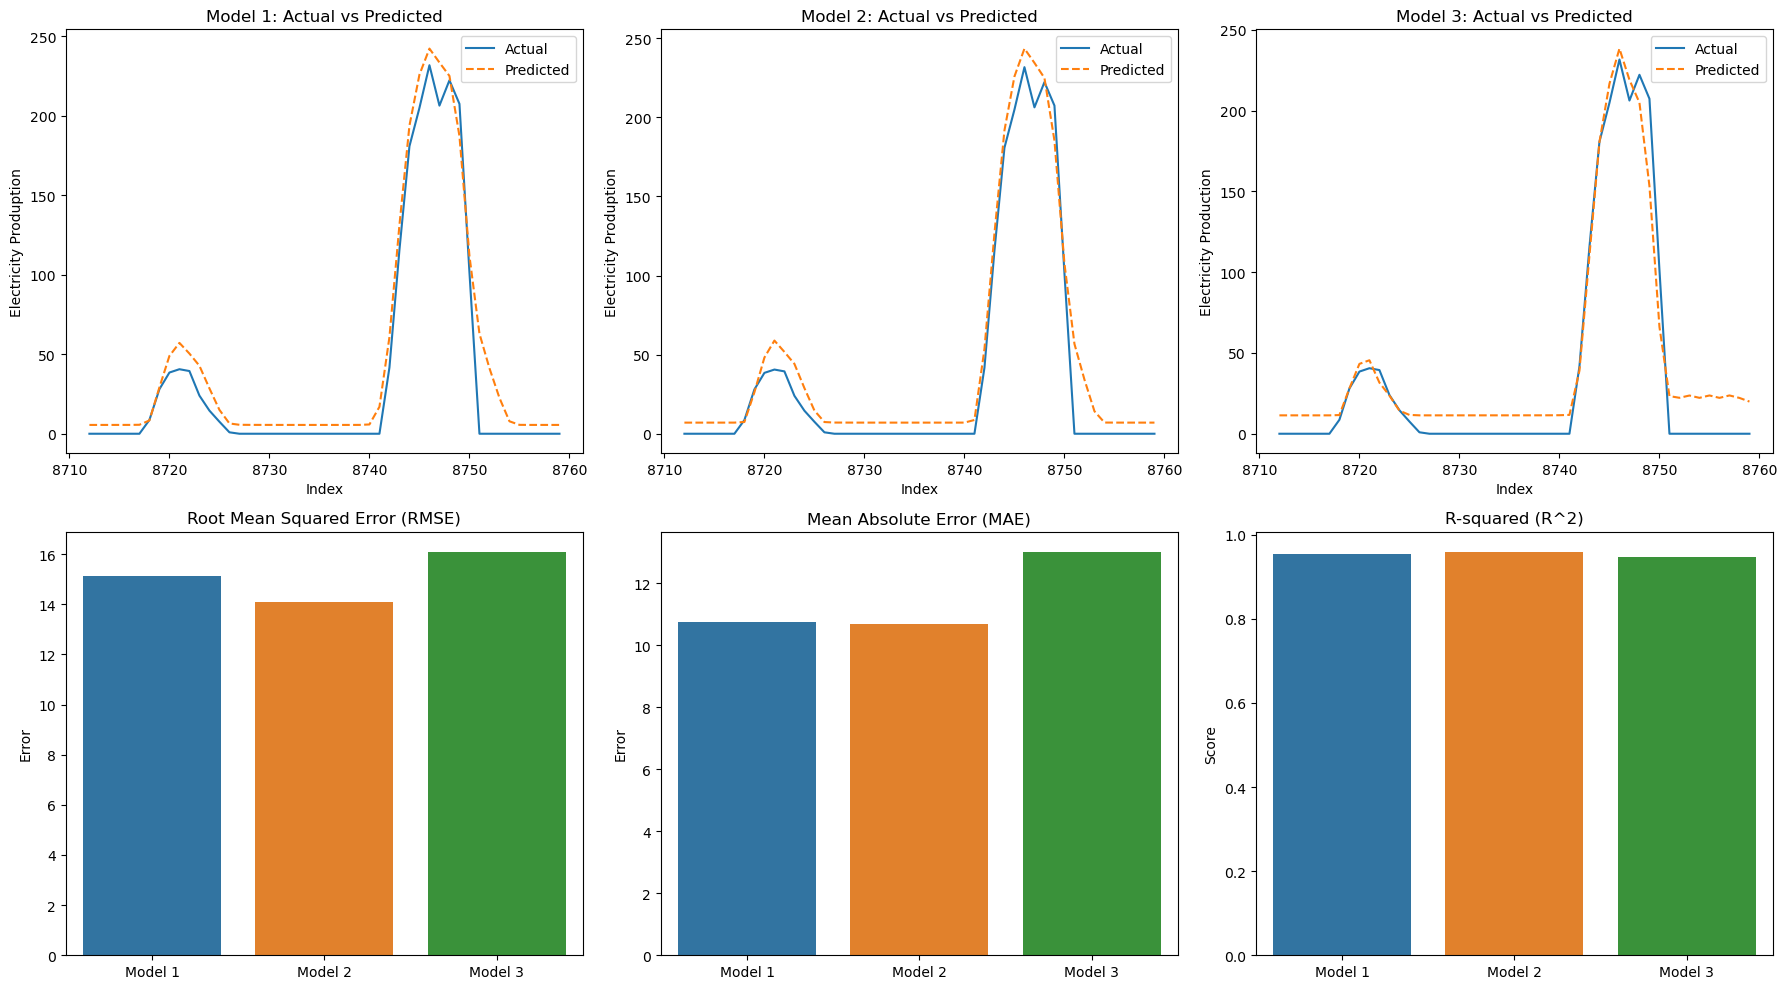

In [16]:
# Plotting
# Calculate RMSE, MAE, and R^2 for each model
metrics = []
for data in [data1, data2, data3]:
    rmse = np.sqrt(mean_squared_error(data['Expectations'], data['Predictions']))
    mae = mean_absolute_error(data['Expectations'], data['Predictions'])
    r2 = r2_score(data['Expectations'], data['Predictions'])
    metrics.append({'RMSE': rmse, 'MAE': mae, 'R^2': r2})

# Create figure and subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Actual vs Predicted Electricity Consumption for Model 1
ax1.plot(data1.index, data1['Expectations'], label='Actual')
ax1.plot(data1.index, data1['Predictions'], label='Predicted', linestyle='--')
ax1.set_title('Model 1: Actual vs Predicted')
ax1.set_xlabel('Index')
ax1.set_ylabel('Electricity Produption')
ax1.legend()

# Plot 2: Actual vs Predicted Electricity Consumption for Model 2
ax2.plot(data2.index, data2['Expectations'], label='Actual')
ax2.plot(data2.index, data2['Predictions'], label='Predicted', linestyle='--')
ax2.set_title('Model 2: Actual vs Predicted')
ax2.set_xlabel('Index')
ax2.set_ylabel('Electricity Produption')
ax2.legend()

# Plot 3: Actual vs Predicted Electricity Consumption for Model 3
ax3.plot(data3.index, data3['Expectations'], label='Actual')
ax3.plot(data3.index, data3['Predictions'], label='Predicted', linestyle='--')
ax3.set_title('Model 3: Actual vs Predicted')
ax3.set_xlabel('Index')
ax3.set_ylabel('Electricity Production')
ax3.legend()

# Plot 4: RMSE for each model
sns.barplot(x=['Model 1', 'Model 2', 'Model 3'], y=[metrics[0]['RMSE'], metrics[1]['RMSE'], metrics[2]['RMSE']], ax=ax4)
ax4.set_title('Root Mean Squared Error (RMSE)')
ax4.set_ylabel('Error')

# Plot 5: MAE for each model
sns.barplot(x=['Model 1', 'Model 2', 'Model 3'], y=[metrics[0]['MAE'], metrics[1]['MAE'], metrics[2]['MAE']], ax=ax5)
ax5.set_title('Mean Absolute Error (MAE)')
ax5.set_ylabel('Error')

# Plot 6: R^2 for each model
sns.barplot(x=['Model 1', 'Model 2', 'Model 3'], y=[metrics[0]['R^2'], metrics[1]['R^2'], metrics[2]['R^2']], ax=ax6)
ax6.set_title('R-squared (R^2)')
ax6.set_ylabel('Score')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Epoch 1/100
194/194 [==============================] - 5s 6ms/step - loss: 0.1738 - val_loss: 0.1035
Epoch 2/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1342 - val_loss: 0.0964
Epoch 3/100
194/194 [==============================] - 1s 5ms/step - loss: 0.1274 - val_loss: 0.0979
Epoch 4/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1243 - val_loss: 0.0956
Epoch 5/100
194/194 [==============================] - 1s 5ms/step - loss: 0.1236 - val_loss: 0.0929
Epoch 6/100
194/194 [==============================] - 1s 5ms/step - loss: 0.1114 - val_loss: 0.0505
Epoch 7/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0334 - val_loss: 0.0101
Epoch 8/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0211 - val_loss: 0.0095
Epoch 9/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0187 - val_loss: 0.0079
Epoch 10/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0182 - val_lo

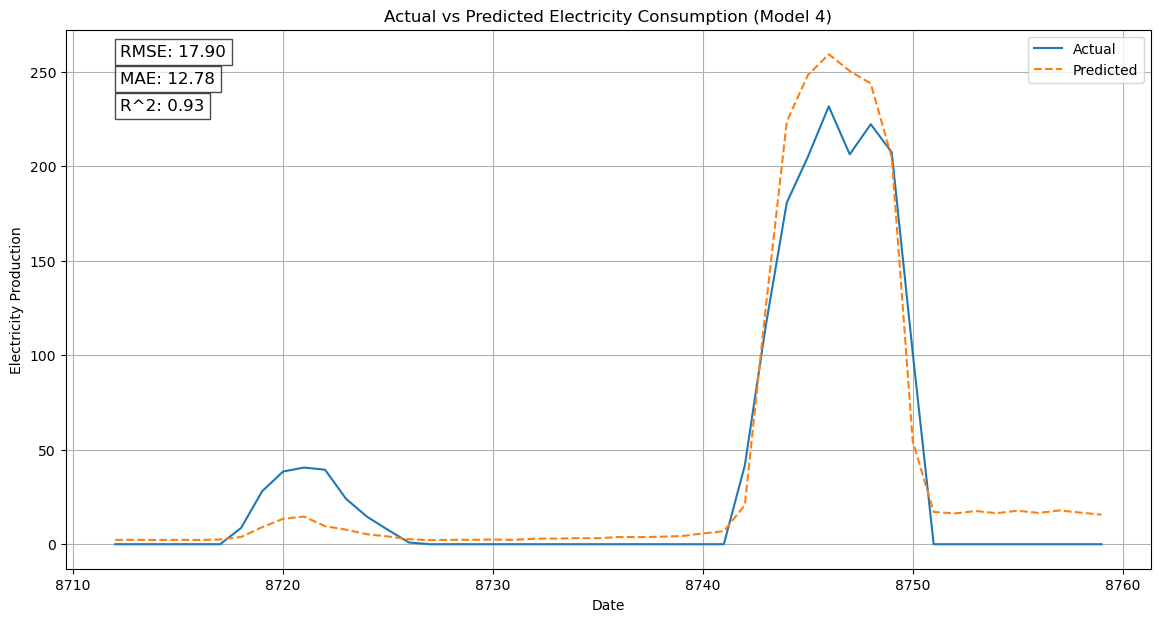

In [17]:
#model 4
from keras.optimizers import RMSprop
Optimizer = RMSprop(learning_rate=0.001)

features4 = ['t2m', 'swgdn', 'cldtot', 'Hour sin', 'Hour cos']
target4 = 'electricity'

# Normalize the data
scaler_X4 = MinMaxScaler()
scaler_Y4 = MinMaxScaler()

X4 = scaler_X4.fit_transform(df2[features4])
Y4 = scaler_Y4.fit_transform(df2[[target4]])

# Reshape the data to be 3D for LSTM: [samples, time steps, features]
X4 = X4.reshape((X4.shape[0], 1, X4.shape[1]))

# Split data into training and testing sets
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size=48, shuffle=False)

model4 = Sequential([LSTM(128, activation='sigmoid', return_sequences=True),
                        Dropout(0.2),
                        LSTM(64, activation='sigmoid', return_sequences=True),
                        Dropout(0.2),
                        LSTM(32, activation='sigmoid', return_sequences=True),
                        Dropout(0.2),
                        LSTM(16, activation='sigmoid', return_sequences=False),
                        Dropout(0.2),
                        Dense(8),
                        Dense(1)])
model4.compile(loss='mse', optimizer='adam')

early_stopping4 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history4 = model4.fit(X_train4, Y_train4, epochs=100, batch_size=36, validation_split=0.2, callbacks=[early_stopping4])

# Initialize lists to store predictions and expected values
predictions4 = []
expected4 = []

# Iterate over the last 48 samples in the test set to make predictions
for i in range(len(X_test4)):
    # Reshape the input for prediction
    reshaped_input4 = X_test4[i, :].reshape(1, X_test4.shape[1], X_test4.shape[2])

    # Make prediction
    yhat_scaled4 = model4.predict(reshaped_input4)
    yhat_scaled4 = yhat_scaled4[0][0]  # Get the prediction value

    # Revert the scaling for prediction and expected values
    yhat4 = scaler_Y4.inverse_transform(np.array([[yhat_scaled4]]))[0][0]  # Corrected this line
    expected_value4 = scaler_Y4.inverse_transform(np.array([[Y_test4[i][0]]]))[0][0]  # Corrected this line

    # Store expected and predicted values
    expected4.append(expected_value4)
    predictions4.append(yhat4)

    # Print the results for each hour (optional)
    print(f'Hour {i+1}, Predicted={yhat4}, Expected={expected_value4}')

# Calculate mean squared error for the last 48 hours
mse4 = mean_squared_error(expected4, predictions4)
print('Overall Loss (Mean Squared Error) for the last 48 hours:', mse4)

# Create DataFrame for Model 4
data4 = pd.DataFrame({'Expectations': expected4, 'Predictions': predictions4}, index=df2.index[-48:])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data4.index, data4['Expectations'], label='Actual')
plt.plot(data4.index, data4['Predictions'], label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Electricity Consumption (Model 4)')
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.legend()

# Annotate with metrics
plt.annotate(f'RMSE: {np.sqrt(mse4):.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))
plt.annotate(f'MAE: {mean_absolute_error(data4["Expectations"], data4["Predictions"]):.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))
plt.annotate(f'R^2: {r2_score(data4["Expectations"], data4["Predictions"]):.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True)
plt.show()



C:\Users\johnn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\johnn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\johnn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


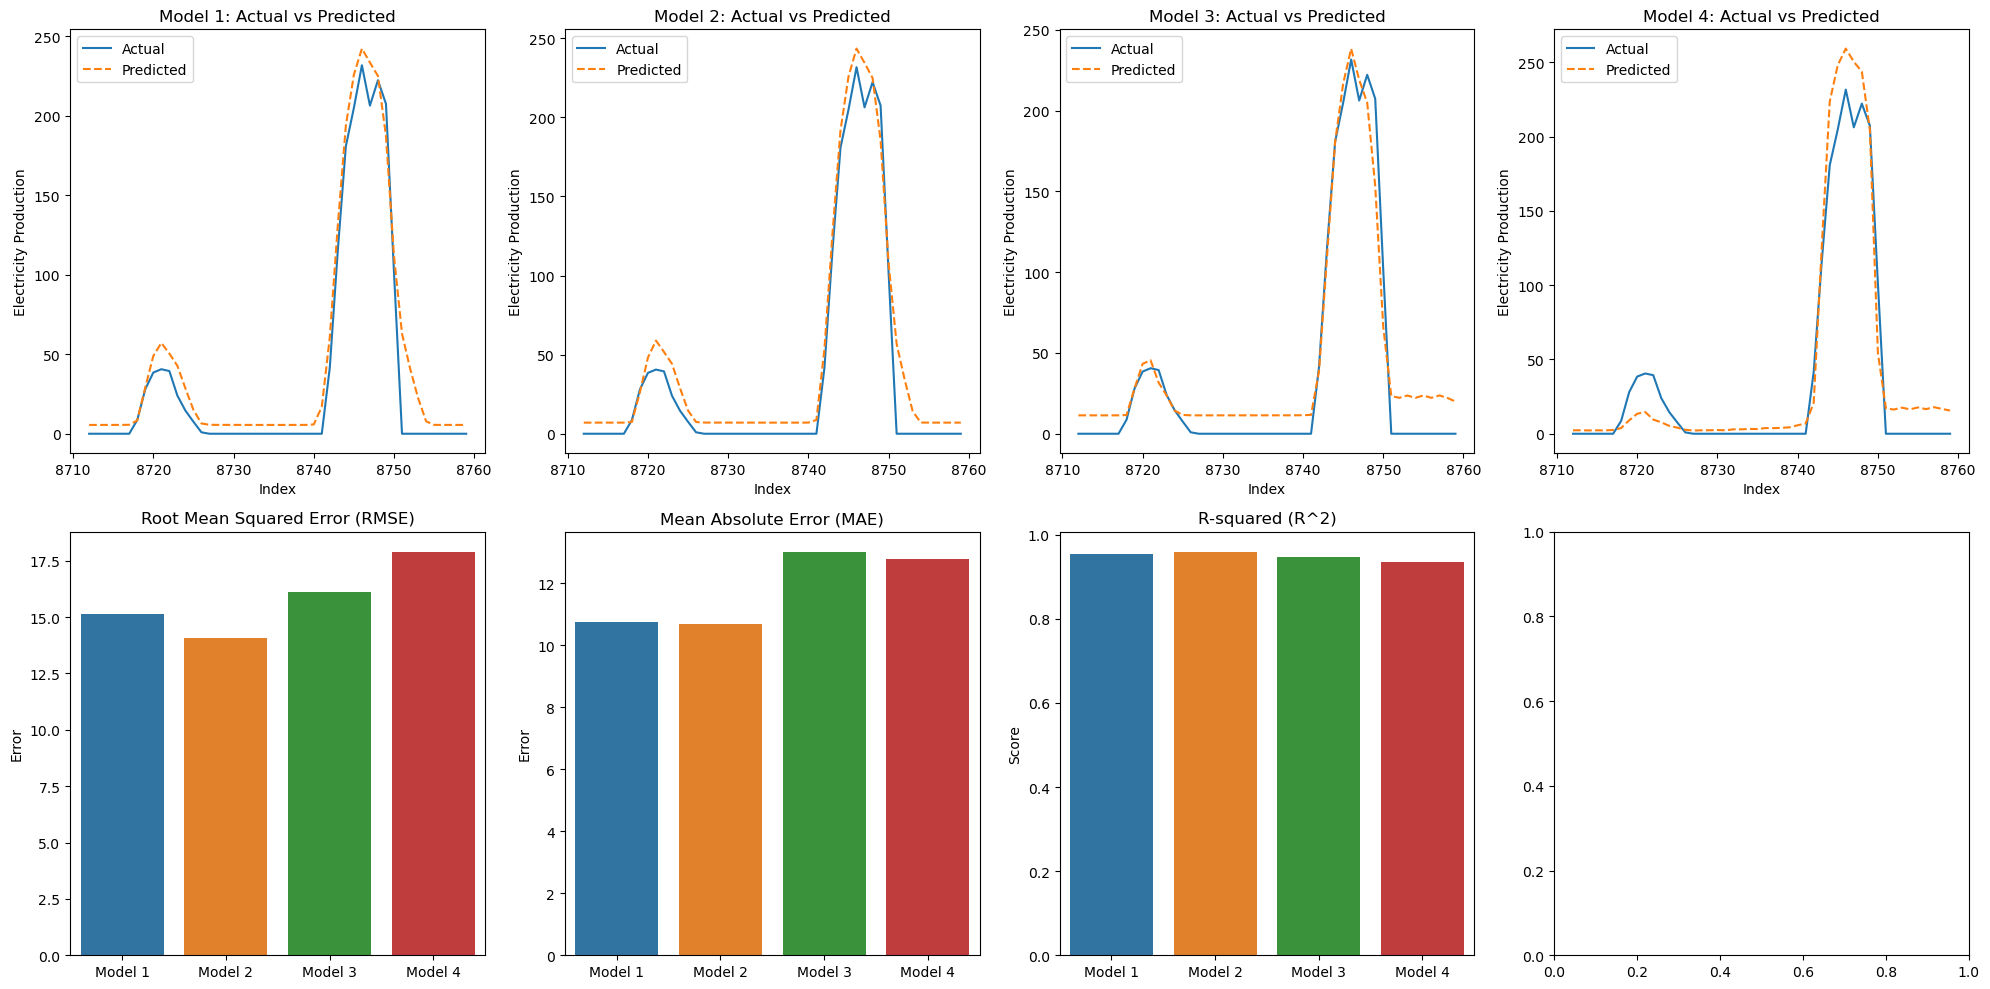

In [18]:


# Calculate RMSE, MAE, and R^2 for each model
metrics2 = []
for data in [data1, data2, data3, data4]:
    rmse = np.sqrt(mean_squared_error(data['Expectations'], data['Predictions']))
    mae = mean_absolute_error(data['Expectations'], data['Predictions'])
    r2 = r2_score(data['Expectations'], data['Predictions'])
    metrics2.append({'RMSE': rmse, 'MAE': mae, 'R^2': r2})

# Create figure and subplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 10))

# Plot 1: Actual vs Predicted Electricity Consumption for Model 1
ax1.plot(data1.index, data1['Expectations'], label='Actual')
ax1.plot(data1.index, data1['Predictions'], label='Predicted', linestyle='--')
ax1.set_title('Model 1: Actual vs Predicted')
ax1.set_xlabel('Index')
ax1.set_ylabel('Electricity Production')
ax1.legend()

# Plot 2: Actual vs Predicted Electricity Consumption for Model 2
ax2.plot(data2.index, data2['Expectations'], label='Actual')
ax2.plot(data2.index, data2['Predictions'], label='Predicted', linestyle='--')
ax2.set_title('Model 2: Actual vs Predicted')
ax2.set_xlabel('Index')
ax2.set_ylabel('Electricity Production')
ax2.legend()

# Plot 3: Actual vs Predicted Electricity Consumption for Model 3
ax3.plot(data3.index, data3['Expectations'], label='Actual')
ax3.plot(data3.index, data3['Predictions'], label='Predicted', linestyle='--')
ax3.set_title('Model 3: Actual vs Predicted')
ax3.set_xlabel('Index')
ax3.set_ylabel('Electricity Production')
ax3.legend()

# Plot 4: Actual vs Predicted Electricity Consumption for Model 4
ax4.plot(data4.index, data4['Expectations'], label='Actual')
ax4.plot(data4.index, data4['Predictions'], label='Predicted', linestyle='--')
ax4.set_title('Model 4: Actual vs Predicted')
ax4.set_xlabel('Index')
ax4.set_ylabel('Electricity Production')
ax4.legend()

# Plot 5: RMSE for each model
sns.barplot(x=['Model 1', 'Model 2', 'Model 3', 'Model 4'],
            y=[metrics2[0]['RMSE'], metrics2[1]['RMSE'], metrics2[2]['RMSE'], metrics2[3]['RMSE']], ax=ax5)
ax5.set_title('Root Mean Squared Error (RMSE)')
ax5.set_ylabel('Error')

# Plot 6: MAE for each model
sns.barplot(x=['Model 1', 'Model 2', 'Model 3', 'Model 4'],
            y=[metrics2[0]['MAE'], metrics2[1]['MAE'], metrics2[2]['MAE'], metrics2[3]['MAE']], ax=ax6)
ax6.set_title('Mean Absolute Error (MAE)')
ax6.set_ylabel('Error')

# Plot 7: R^2 for each model
sns.barplot(x=['Model 1', 'Model 2', 'Model 3', 'Model 4'],
            y=[metrics2[0]['R^2'], metrics2[1]['R^2'], metrics2[2]['R^2'], metrics2[3]['R^2']], ax=ax7)
ax7.set_title('R-squared (R^2)')
ax7.set_ylabel('Score')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
